In [2]:
import os
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("img_align_celeba"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 0 directories and 202599 images in 'img_align_celeba'.


In [2]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir):
    # Get a random image path
    random_image = random.sample(os.listdir(target_dir), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_dir + "/" + random_image[0])
    plt.imshow(img)
    plt.axis("off");
    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

Image shape: (218, 178, 3)


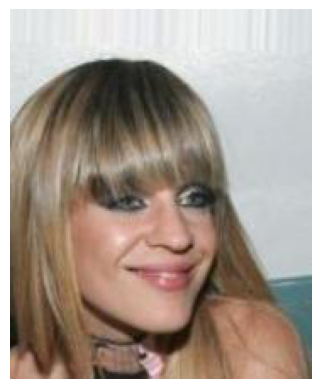

In [3]:
# View a random image from the training dataset
img = view_random_image(target_dir="img_align_celeba")

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "img_align_celeba"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(256, 256),
                                               class_mode = None,
                                               seed=42)

2022-11-07 16:38:31.434911: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-07 16:38:32.206263: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib64:/home/youcef/slam_ws/devel/lib:/home/youcef/aldo_sync_ws/devel/lib:/home/youcef/Desktop/tuto_ws/devel/lib:/opt/ros/noetic/lib:/opt/ros/noetic/lib/x86_64-linux-gnu:/home/youcef/bebop_ws/devel/lib/parrot_arsdk
2022-11-07 16:38:32.206330: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-07 16:38:32.293516:

Found 0 images belonging to 0 classes.


In [43]:
import cv2
import numpy as np

N_IMAGES = 10000
IMG_SIZE = 256
IMG_PATH = 'images_%i_%i.pth' % (IMG_SIZE, IMG_SIZE)
ATTR_PATH = 'attributes.pth'


def preprocess_images():

    print("Reading images from img_align_celeba/ ...")
    raw_images = []
    for i in range(1, N_IMAGES + 1):
        if i % 10000 == 0:
            print(i)
        raw_images.append(mpimg.imread('img_align_celeba/%06i.jpg' % i)[20:-20])

    if len(raw_images) != N_IMAGES:
        raise Exception("Found %i images. Expected %i" % (len(raw_images), N_IMAGES))

    print("Resizing images ...")
    all_images = []
    for i, image in enumerate(raw_images):
        if i % 10000 == 0:
            print(i)
        assert image.shape == (178, 178, 3)
        if IMG_SIZE < 178:
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_AREA)
        elif IMG_SIZE > 178:
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_LANCZOS4)
        assert image.shape == (IMG_SIZE, IMG_SIZE, 3)
        all_images.append(image)

    return np.array(all_images)

In [44]:
X_train = preprocess_images()

Reading images from img_align_celeba/ ...
10000
Resizing images ...
0


: 

: 

In [8]:
X_train.shape

(1000, 256, 256, 3)

In [36]:
def preprocess_attributes():

    attr_lines = [line.rstrip() for line in open('list_attr_celeba.txt', 'r')][:N_IMAGES + 2]
    #print(attr_lines)
    assert len(attr_lines) == N_IMAGES + 2

    # attr_keys = attr_lines[1].split()
    # print(attr_keys)
    # attributes = {k: np.zeros(N_IMAGES, dtype=bool) for k in attr_keys}
    attributes = []
    for i, line in enumerate(attr_lines[2:]):
        image_id = i + 1
        split = line.split()
        assert len(split) == 41
        assert split[0] == ('%06i.jpg' % image_id)
        assert all(x in ['-1', '1'] for x in split[1:])
        A=[]
        for j, value in enumerate(split[1:]):
            # attributes[attr_keys[j]][i] = value == '1'
            A.append(value)
        attributes.append(A)

    return np.array(attributes)

In [37]:
y_train = preprocess_attributes()

In [38]:
y_train.shape

(1000, 40)

['-1' '1' '1' '-1' '-1' '-1' '-1' '-1' '1' '-1' '-1' '-1' '-1' '-1' '-1'
 '-1' '-1' '-1' '-1' '1' '-1' '-1' '-1' '-1' '1' '-1' '-1' '-1' '-1' '-1'
 '-1' '-1' '-1' '-1' '-1' '-1' '1' '-1' '-1' '1']


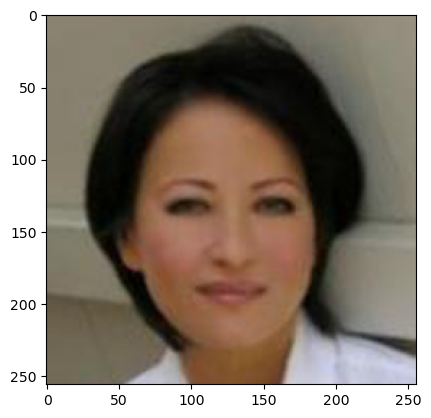

In [41]:
plt.imshow(X_train[100])
print(y_train[100])